# Project 2 - Databases

Project 2 builds on your experience with SQL. You will use SQL to query the pets database and then Python to further process that data and create visualizations. The project is broken into parts that increase in complexity. 

Comment your code as needed. Be sure that plots are neatly labeled and presented.

Save a copy of this file to your drive. Append your hollins username to the filename, e.g. CMPS 245 Project 2 schrementig

Be sure to mount your Google Drive, either from the Files sidebar and selecting Google Drive, or with mounting code.

Submit your homework by sharing it with hollinsdatascience@gmail.com

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import altair as alt
import sqlite3

In [3]:
# Connect to the database in read only mode
dbc = sqlite3.connect('file:/content/drive/My Drive/Hollins Data Science/Datasets/pets.db?mode=ro', uri=True)

## Part One

Part One involves generating some tables from the pets data. You should craft a query and then output the top 5 or 10 rows of the resulting dataframe (using head() or head(10)).

1) Generate a table showing the top 5 dog names.



In [4]:
dog = "SELECT animal_s_name AS DogNames FROM pets WHERE species = 'Dog'"
dog += " GROUP BY animal_s_name ORDER BY COUNT(animal_s_name) DESC;"

dog_df = pd.read_sql_query(dog, dbc)
dog_df.head(5)

,DogNames
0,Lucy
1,Charlie
2,Bella
3,Daisy
4,Buddy


2) Generate a table showing the top 5 cat names.

In [5]:
cat = "SELECT animal_s_name AS CatNames FROM pets WHERE species = 'Cat'"
cat += " GROUP BY animal_s_name ORDER BY COUNT(animal_s_name) DESC;"

cat_df = pd.read_sql_query(cat, dbc)
cat_df.head(5)

,CatNames
0,Lucy
1,Max
2,Luna
3,Bella
4,Oliver


3) Generate a table showing the top 10 dog breeds.

In [6]:
dogbreeds = "SELECT primary_breed AS DogBreeds FROM pets WHERE species = 'Dog'"
dogbreeds += " GROUP BY primary_breed ORDER BY COUNT(primary_breed) DESC;"

dogbreeds_df = pd.read_sql_query(dogbreeds, dbc)
dogbreeds_df.head(10)

,DogBreeds
0,"Retriever, Labrador"
1,"Retriever, Golden"
2,"Chihuahua, Short Coat"
3,German Shepherd
4,Australian Shepherd
5,Terrier
6,Border Collie
7,"Terrier, American Pit Bull"
8,"Poodle, Miniature"
9,Shih Tzu


4) Generate a table of species counts.

In [7]:
speciescount_df = pd.read_sql_query("SELECT species, COUNT(species) AS SpeciesCount FROM pets GROUP BY species;", dbc)
speciescount_df.head(10)

,species,SpeciesCount
0,Cat,21612
1,Dog,42587
2,Livestock,51


## Part Two

In this part, you will create a series of visualizations to explore some of the data.

1) Create a bar plot of the total number of returns in each income bracket across the zip codes. You will need to sum across the zip codes. This summing should be done in Python not the query.

For the bars to be sorted in the proper order you will likely have to sort them, as in the code snippet below.

```
x=alt.X('Income Brackets', sort=['below_25k', 'btw_25k_50k', 'btw_50k_75k', 'btw_75k_100k',
       'btw_100k_200k', 'above_200k'])
```



In [8]:
returns_df = pd.read_sql_query("SELECT * FROM num_returns;", dbc)
returns_df.head(5)

,zip_code,below_25k,btw_25k_50k,btw_50k_75k,btw_75k_100k,btw_100k_200k,above_200k
0,98001,4420,3750,2520,1850,2680,540
1,98002,5590,5140,2440,1280,1140,120
2,98003,7790,6450,3280,1750,2070,400
3,98004,3210,2300,1970,1590,4290,4080
4,98005,1980,1550,1270,1020,2190,1600


In [9]:
total_returns = returns_df.sum(axis=0).reset_index()

final_returns = total_returns.drop(0)
final_returns = final_returns.rename({'index':'Income Brackets', 0:'Total Returns'}, axis=1)
final_returns

,Income Brackets,Total Returns
1,below_25k,1032180
2,btw_25k_50k,802720
3,btw_50k_75k,499980
4,btw_75k_100k,342870
5,btw_100k_200k,525510
6,above_200k,183630


In [46]:
X = alt.X('Income Brackets', sort=['below_25k', 'btw_25k_50k', 'btw_50k_75k', 
                                   'btw_75k_100k', 'btw_100k_200k', 'above_200k'], bin=False)

alt.Chart(final_returns).mark_bar().encode(
    X, y= 'Total Returns'
).properties(title='total number of returns in each income bracket across the zip codes')

alt.Chart(...)

2) Create a bar plot of the number of dependents per return in each income bracket across the zip codes. You will need to sum both dependents and returns across the zip codes before doing the division to get dependents per return. This summing and division should be done in Python not the query.

In [11]:
dependents_df = pd.read_sql_query("SELECT * FROM num_dependents;", dbc)
dependents_df.head(5)

,zip_code,below_25k,btw_25k_50k,btw_50k_75k,btw_75k_100k,btw_100k_200k,above_200k
0,98001,1640,2350,2000,1500,2370,520
1,98002,3250,4770,2150,1210,910,100
2,98003,4100,5640,3010,1550,1640,310
3,98004,480,610,550,460,1800,4010
4,98005,420,650,540,480,1450,1900


In [12]:
total_dependents = dependents_df.sum(axis=0).reset_index()

final_dependents = total_dependents.drop(0)
final_dependents = final_dependents.rename({'index':'Income Brackets', 0:'Total Dependents'}, axis=1)
final_dependents

,Income Brackets,Total Dependents
1,below_25k,380680
2,btw_25k_50k,518710
3,btw_50k_75k,336240
4,btw_75k_100k,243590
5,btw_100k_200k,425550
6,above_200k,179810


In [13]:
dep_return = pd.merge(final_returns, final_dependents, on='Income Brackets')

dep_return['Dependents per Return'] = dep_return['Total Dependents'] / dep_return['Total Returns']
dep_return

,Income Brackets,Total Returns,Total Dependents,Dependents per Return
0,below_25k,1032180,380680,0.368812
1,btw_25k_50k,802720,518710,0.646190
2,btw_50k_75k,499980,336240,0.672507
3,btw_75k_100k,342870,243590,0.710444
4,btw_100k_200k,525510,425550,0.809785
5,above_200k,183630,179810,0.979197


In [14]:
alt.Chart(dep_return).mark_bar().encode(
    X, y= 'Dependents per Return'
).properties(title='the number of dependents per return in each income bracket across the zip codes')

alt.Chart(...)

## Part Three

In this part we will more closely examine the relationship between pet ownership and wealth. All of the following plots will be based on zip codes that have more than 1000 pets in database. This ensures that we are working with zip codes where we have good data about pet ownership.

We are going to start by examining the connection between pet ownership and the number of dependents in a zip code. Dependents are a good stand in for children. Does the number of pets in a zip code seem to correlate with the number of dependents? 

Place your answers to questions in a text cell after your plots.

1) Create a scatter plot of pet count (y-axis) vs total dependents (x-axis) in the qualifying zip codes (those with over 1000 pets). You will have to sum the total dependents across all income brackets for each zip code. This summing should be done in Python not the query.

Do you see evidence of correlation, i.e. does the number of pets seem to go up as the number of dependents goes up?


In [15]:
query = "SELECT zip_code, COUNT(pet_id) AS PetCount FROM pets"
query += " GROUP BY zip_code HAVING PetCount > 1000;"

petcount_df = pd.read_sql_query(query, dbc)
petcount_df.head()

,zip_code,PetCount
0,98102,2045
1,98103,5492
2,98105,2557
3,98106,2224
4,98107,3056


In [16]:
dep_df1 = dependents_df.iloc[:, 1:].sum(axis=1).reset_index()

dep_df1['zip_code'] = dependents_df['zip_code']
dep_df1.drop(['index'], axis=1, inplace=True)
dep_df1 = dep_df1.rename({0:'Total Dependents'}, axis=1)

dep_df1.head()

,Total Dependents,zip_code
0,10380,98001
1,12390,98002
2,16250,98003
3,7910,98004
4,5440,98005


In [17]:
merged_df1 = pd.merge(dep_df1, petcount_df, how='right', on='zip_code')
merged_df1.head()

,Total Dependents,zip_code,PetCount
0,1690,98102,2045
1,8050,98103,5492
2,5370,98105,2557
3,6960,98106,2224
4,3440,98107,3056


In [18]:
alt.Chart(merged_df1).mark_point().encode(
    x= 'Total Dependents',
    y= 'PetCount'
).properties(title='Number of Pets and Dependents in a Zip Code')

alt.Chart(...)

**Do you see evidence of correlation, i.e. does the number of pets seem to go up as the number of dependents goes up?**

**The number of pets seems to go up along with the number of dependents, suggesting a positive correlation.**

2) Now create the same scatter plot but restrict total dependents to just those in the two lower income brackets, i.e. only include the two lower brackets in your sum.  

How similar is the plot to the one from the first question? 
Do you see evidence of correlation?

In [19]:
dep_df2 = dependents_df.iloc[:, 1:3].sum(axis=1).reset_index()

dep_df2['zip_code'] = dependents_df['zip_code']
dep_df2.drop(['index'], axis=1, inplace=True)
dep_df2 = dep_df2.rename({0:'Total Dependents'}, axis=1)

dep_df2.head()

,Total Dependents,zip_code
0,3990,98001
1,8020,98002
2,9740,98003
3,1090,98004
4,1070,98005


In [20]:
merged_df2 = pd.merge(dep_df2, petcount_df, how='right', on='zip_code')
merged_df2.head()

,Total Dependents,zip_code,PetCount
0,260,98102,2045
1,1440,98103,5492
2,810,98105,2557
3,3860,98106,2224
4,520,98107,3056


In [21]:
alt.Chart(merged_df2).mark_point().encode(
    x= 'Total Dependents',
    y= 'PetCount'
).properties(title='Number of Pets and Dependents in a Zip Code (Lower Income Brackets)')

alt.Chart(...)

**How similar is the plot to the one from the first question? Do you see evidence of correlation?**

**This plot does not show correlation and it is not similar to the plot from the first question.**

3) Now create the same scatter plot but restrict total dependents to just those in the two upper income brackets, i.e. only include the two upper brackets in your sum. 

How similar is the plot to the one from the first question? 
Do you see evidence of correlation?

In [22]:
dep_df3 = dependents_df.iloc[:, 5:].sum(axis=1).reset_index()

dep_df3['zip_code'] = dependents_df['zip_code']
dep_df3.drop(['index'], axis=1, inplace=True)
dep_df3 = dep_df3.rename({0:'Total Dependents'}, axis=1)

dep_df3.head()

,Total Dependents,zip_code
0,2890,98001
1,1010,98002
2,1950,98003
3,5810,98004
4,3350,98005


In [23]:
merged_df3 = pd.merge(dep_df3, petcount_df, how='right', on='zip_code')
merged_df3.head()

,Total Dependents,zip_code,PetCount
0,1120,98102,2045
1,5250,98103,5492
2,3900,98105,2557
3,1270,98106,2224
4,2200,98107,3056


In [24]:
alt.Chart(merged_df3).mark_point().encode(
    x= 'Total Dependents', 
    y= 'PetCount',
).properties(title='Number of Pets and Dependents in a Zip Code (Upper Income Brackets)')

alt.Chart(...)

**How similar is the plot to the one from the first question? Do you see evidence of correlation?**

**Yes, this plot looks similar to the plot from the first question. There is evidence of a positive correlation.**

For problems 4, 5, and 6 in this part we are going to create the same scatter plots but this time normalizing for population. You should have pet_count divided by population for the y-axis and dependents divided by population for the x-axis. Again, the calculations should be done in Python not the query.

4) For this first scatter plot sum across all brackets when totaling dependents. Do you see evidence of correlation?


In [25]:
pop_df = pd.read_sql_query("SELECT * FROM population ;", dbc)
pop_df.head()

,zip_code,population
0,98001,34742
1,98002,34294
2,98003,48912
3,98004,33605
4,98005,19077


In [26]:
merged_df4 = pd.merge(pop_df, merged_df1, how='right', on='zip_code')
merged_df4.head()

,zip_code,population,Total Dependents,PetCount
0,98102,25642,1690,2045
1,98103,51917,8050,5492
2,98105,51947,5370,2557
3,98106,25383,6960,2224
4,98107,27631,3440,3056


In [27]:
merged_df4['PetCount by Pop'] = merged_df4['PetCount'] / merged_df4['population']
merged_df4['Dependents by Pop'] = merged_df4['Total Dependents'] / merged_df4['population']

In [28]:
alt.Chart(merged_df4).mark_point().encode(
    x= 'Dependents by Pop',
    y= 'PetCount by Pop'
).properties(title='Number of Pets and Dependents normalizing for Population')

alt.Chart(...)

**Do you see evidence of correlation?**

**There is no evidence of correlation.**

5) Now create the same scatter plot but restrict total dependents to just those in the two lower income brackets, i.e. only include the two lower brackets in your sum.  

How similar is the plot to the one from the question four? 
Do you see evidence of correlation?

In [29]:
merged_df5 = pd.merge(pop_df, merged_df2, how='right', on='zip_code')
merged_df5.head()

,zip_code,population,Total Dependents,PetCount
0,98102,25642,260,2045
1,98103,51917,1440,5492
2,98105,51947,810,2557
3,98106,25383,3860,2224
4,98107,27631,520,3056


In [30]:
merged_df5['PetCount by Pop'] = merged_df5['PetCount'] / merged_df5['population']
merged_df5['Dependents by Pop'] = merged_df5['Total Dependents'] / merged_df5['population']

In [31]:
alt.Chart(merged_df5).mark_point().encode(
    x= 'Dependents by Pop',
    y= 'PetCount by Pop'
).properties(title='Number of Pets and Dependents normalizing for Population (Lower Income Brackets)')

alt.Chart(...)

**How similar is the plot to the one from the question four? Do you see evidence of correlation?**

**There is no evidence of correlation. The plot does not look similar to the one from question 4 however both do not share signs of correlation.**

6) Now create the same scatter plot but restrict total dependents to just those in the two upper income brackets, i.e. only include the two upper brackets in your sum. 

How similar is the plot to the one from question four? 
Do you see evidence of correlation?

In [32]:
merged_df6 = pd.merge(pop_df, merged_df3, how='right', on='zip_code')
merged_df6.head()

,zip_code,population,Total Dependents,PetCount
0,98102,25642,1120,2045
1,98103,51917,5250,5492
2,98105,51947,3900,2557
3,98106,25383,1270,2224
4,98107,27631,2200,3056


In [33]:
merged_df6['PetCount by Pop'] = merged_df6['PetCount'] / merged_df6['population']
merged_df6['Dependents by Pop'] = merged_df6['Total Dependents'] / merged_df6['population']

In [34]:
alt.Chart(merged_df6).mark_point().encode(
    x= 'Dependents by Pop',
    y= 'PetCount by Pop' 
).properties(title='Number of Pets and Dependents normalizing for Population (Upper Income Brackets)')

alt.Chart(...)

**How similar is the plot to the one from question four? Do you see evidence of correlation?**

**It seems like there is evidence of correlation. It is  not similar to the plot from question four.**

## Part Four

Create two visualizations of your own based on the datasets available to you. You can work with any or all of the tables in the database. You could do something related to what we've done or something unrelated, like dog and cat differences. Feel free to use additional visual dimensions like color or size.

**Q-1. Create a visualization of distribution of 'Golden Retriever' at zipcodes with top 10 total dependents.**


In [35]:
gldretv = "SELECT zip_code, COUNT(pet_id) AS GoldenCount FROM pets"
gldretv += " GROUP BY zip_code, primary_breed HAVING primary_breed = 'Retriever, Golden' ORDER BY GoldenCount DESC;"

gldretv_df = pd.read_sql_query(gldretv, dbc)
gldretv_df.head()

,zip_code,GoldenCount
0,98115,243
1,98117,206
2,98103,192
3,98112,140
4,98199,139


In [36]:
visualize = pd.merge(dep_df1, gldretv_df, how='left', on='zip_code') #using the dep_df1 that we created in part-3, q-1

visualize1 = visualize.dropna() #zip codes with total values might not have golden retriever as pets 

top_10 = visualize1.sort_values(by=['Total Dependents'], ascending=False).head(10)
top_10

,Total Dependents,zip_code,GoldenCount
66,14170,98118,97.0
63,11570,98115,243.0
72,10220,98133,63.0
76,9220,98146,30.0
78,8780,98155,1.0
70,8550,98125,99.0
54,8050,98103,192.0
65,7930,98117,206.0
83,7780,98178,12.0
31,7550,98040,1.0


In [37]:
top_10['zip_code'] = top_10['zip_code'].astype(str)

alt.Chart(top_10).mark_bar().encode(
    x='zip_code', 
    y='GoldenCount',
    color=alt.Color('Total Dependents', scale=alt.Scale(scheme='dark2'))
).properties(title='Golden Retriever in zip codes with top 10 total dependents')

alt.Chart(...)

**Q-2. Visualize the distribution of cat species at zip code with highest breed count.**

In [38]:
distribution = "SELECT zip_code, COUNT(pet_id) AS CatCount FROM pets WHERE species = 'Cat'"
distribution += " GROUP BY zip_code ORDER BY CatCount DESC;" 

distribution_df = pd.read_sql_query(distribution, dbc) #finding the zip_code with highest number of cats
distribution_df.head() 

,zip_code,CatCount
0,98103,2056
1,98115,2009
2,98117,1729
3,98125,1320
4,98107,1165


In [39]:
#we will be looking at the distribution of cat species at zip code = 98103
zip = "SELECT primary_breed, COUNT(pet_id) AS BreedCount FROM pets WHERE species = 'Cat'"    
zip += " GROUP BY zip_code, primary_breed HAVING zip_code = 98103 ORDER BY BreedCount DESC;" 

zip_df = pd.read_sql_query(zip, dbc) #finding the distribution of cat breeds in that zip code
zip_df.head()

,primary_breed,BreedCount
0,Domestic Shorthair,1206
1,Domestic Medium Hair,261
2,Domestic Longhair,169
3,American Shorthair,85
4,Siamese,75


In [40]:
total = zip_df['BreedCount'].sum()  #checking if zip_df generated right values; total cat count and breed count matches
total

2056

In [41]:
zip_df['Distribution'] = (zip_df['BreedCount'] / total) * 100

zip_df = zip_df[zip_df['Distribution'] > 1]  #we can better assess the distribution by limiting species with lesser distribution
zip_df

,primary_breed,BreedCount,Distribution
0,Domestic Shorthair,1206,58.657588
1,Domestic Medium Hair,261,12.694553
2,Domestic Longhair,169,8.219844
3,American Shorthair,85,4.134241
4,Siamese,75,3.647860
5,LaPerm,68,3.307393
6,Maine Coon,25,1.215953
7,Mix,22,1.070039


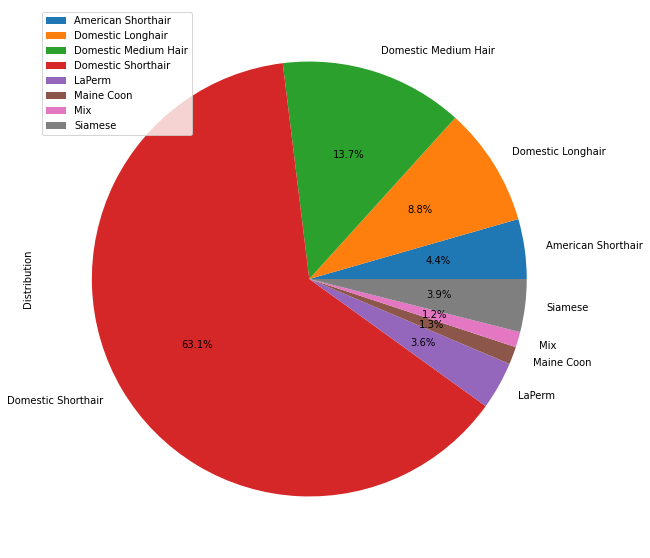

In [42]:
zip_df.groupby(['primary_breed']).sum().plot(kind='pie', y ='Distribution', 
                                             startangle=0,figsize=(15,10), autopct='%1.1f%%')